In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.0.2'

In [4]:
%matplotlib inline

In [149]:
df = pd.read_csv('quikr_car.csv')

In [146]:
df.head()
# The very first point, is this data loaded properly???
# because for this data there are some values in name column which are comma separated!!!
# Simple way to highlight such values is to see the value_counts or unique of all values...

,name,company,year,Price,kms_driven,fuel_type,kms_driven_float
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol,45000.0
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel,40.0
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol,22000.0
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol,28000.0
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel,36000.0


In [148]:
df['year'].unique()
# values are incorrect
# Some non-year values
# Type should be int
# Price also having incorrect values
# Price has ask for price
# Price is object, convert to int
# kms driven is object, convert to int
# kms has Nan
# fuel_type has Nan
# keep first 3 words of name to create a category...


array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


#### Data Preprocessing

Data Type

In [153]:
# year has not int values like zest, sales etc. should be converted to int and drop the rest
df = df[df['year'].str.isnumeric()]

In [154]:
df['year'] = df['year'].astype(int)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [10]:
# Null Values
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [156]:
df['Price'].head()
# Contains "Ask For Price"

0           80,000
1         4,25,000
2    Ask For Price
3         3,25,000
4         5,75,000
Name: Price, dtype: object

In [159]:
df = df[df['Price'] != "Ask For Price"]

In [162]:
df['Price'].head() # dtype = Object

0      80,000
1    4,25,000
3    3,25,000
4    5,75,000
6    1,75,000
Name: Price, dtype: object

In [170]:
df['Price'] = df['Price'].str.replace(",",'').astype(float)

/var/folders/12/ztwysxfn0knb0pl6wlzd08fm0000gq/T/ipykernel_14402/4161170104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(",",'').astype(float)


In [245]:
 df['kms_driven'] = pd.to_numeric(
                     df['kms_driven'].str.split(' ', expand=True)[0].str.replace(',',''), 
                     errors='coerce')
# or u can use the below method
# pd.to_numeric(df['kms_driven'].str.split(' ').str.get(0).str.replace(',',''), errors='coerce')

In [246]:
df = df[df['kms_driven'].notnull()]

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        817 non-null    object 
 1   company     817 non-null    object 
 2   year        817 non-null    object 
 3   Price       817 non-null    float64
 4   kms_driven  817 non-null    int64  
 5   fuel_type   817 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 77.0+ KB


In [230]:
df['fuel_type'].head()
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

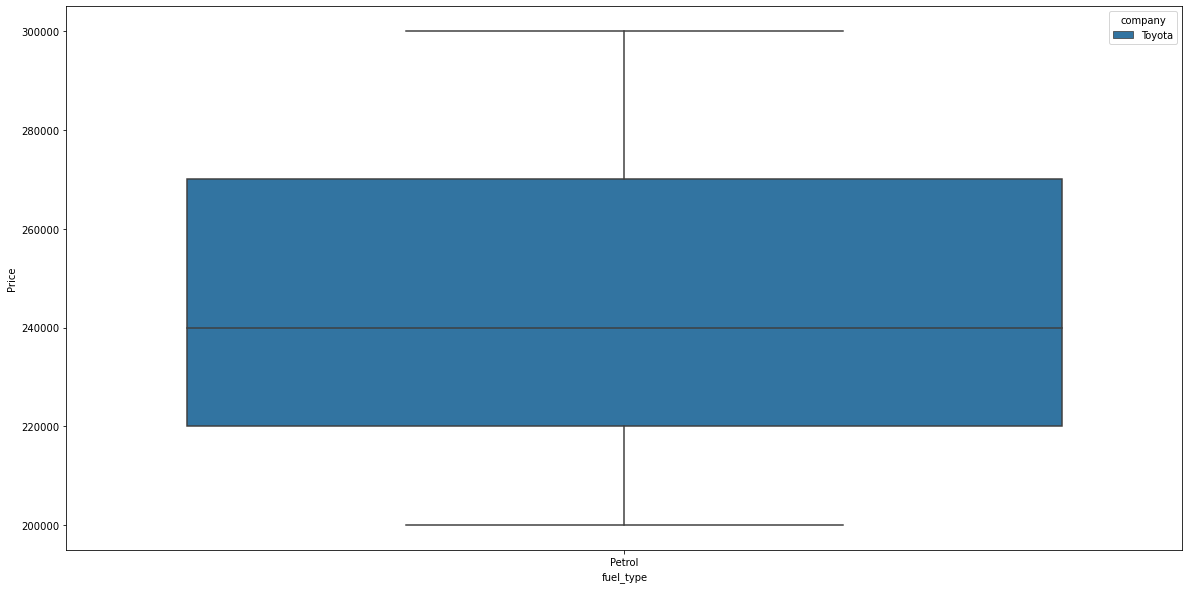

In [225]:
df['fuel_type'].isnull().sum()
# Contains 1 Null values
df[df['fuel_type'].isnull()]
# See the relation of fuel type with price...
plt.figure(figsize=(20,10))
sns.boxplot(data=df[(df['company']=='Toyota') & (df['year'] == '2009')], x='fuel_type', y='Price', hue='company')
plt.show()

In [252]:
df['fuel_type'].fillna(value='Petrol', inplace=True)
df['fuel_type'].isnull().sum()

0

In [228]:
df['fuel_type'].isnull().sum()

0

In [285]:
# Keep the first 3 values of name...
#df['name'].str.split(' ', expand=True).get([0,1,2])#[[0,1,2]]
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [291]:
#df = df.reset_index().drop('index', axis=1)
df = df.reset_index(drop=True)

#### Outlier Detection...

<AxesSubplot:ylabel='Price'>

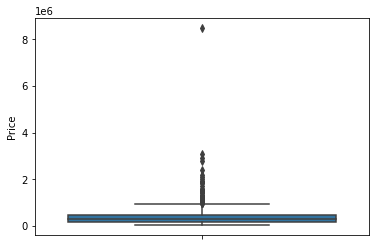

In [293]:
sns.boxplot(data=df, y='Price')

In [294]:
# There is 1 single entry that is extremely away from the point...
# Let's see the quartiles of Price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        817 non-null    object 
 1   company     817 non-null    object 
 2   year        817 non-null    object 
 3   Price       817 non-null    float64
 4   kms_driven  817 non-null    int64  
 5   fuel_type   817 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.4+ KB


In [298]:
df[df['Price'] > 6e6]
# There is just one entry which is greater than 6 lac

df = df[df['Price'] < 6e6].reset_index(drop=True)

In [302]:
df.to_csv('Cleaned Car.csv')

#### Without Pipeline: Data Encoding and Model Processing

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [303]:
X = df.drop('Price', axis=1).copy()
y = df['Price'].copy()

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [307]:
X_train.isnull().sum()

name          0
company       0
year          0
kms_driven    0
fuel_type     0
dtype: int64

In [308]:
from sklearn.preprocessing import OneHotEncoder

In [310]:
ohe_company = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [312]:
X_train_company = ohe_company.fit_transform(X_train[['company']])

In [324]:
X_test_company = ohe_company.transform(X_test[['company']])

In [320]:
X_train_company

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [323]:
# let year be int
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel


In [325]:
from sklearn.preprocessing import OneHotEncoder
ohe_fuel_type = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_fuel_type = ohe_fuel_type.fit_transform(X_train[['fuel_type']])

In [326]:
X_test_fuel_type = ohe_fuel_type.transform(X_test[['fuel_type']])

In [338]:
X_train_fuel_type.shape, X_train_company.shape

((571, 3), (571, 24))

In [331]:
X_train_remainder = X_train.drop(['name','company','fuel_type'], axis=1).copy()

In [350]:
X_train_transformed = np.concatenate([X_train_remainder, X_train_company, X_train_fuel_type], axis=1)

In [342]:
X_test_remainder = X_test.drop(['name','company','fuel_type'], axis=1).copy()

In [349]:
X_test_transformed = np.concatenate([X_test_remainder, X_test_company, X_test_fuel_type], axis=1)

In [351]:
X_train_transformed

array([['2007', 100800, 0.0, ..., 1.0, 0.0, 0.0],
       ['2012', 40000, 0.0, ..., 0.0, 0.0, 1.0],
       ['2011', 43000, 0.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['2011', 45000, 0.0, ..., 1.0, 0.0, 0.0],
       ['2016', 29500, 0.0, ..., 1.0, 0.0, 0.0],
       ['2009', 45000, 0.0, ..., 0.0, 0.0, 1.0]], dtype=object)

In [355]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [345]:
model = LinearRegression()

In [352]:
model.fit(X_train_transformed, y_train)

LinearRegression()

In [353]:
model.predict(X_test_transformed)

array([ 2.56004565e+05,  1.18936401e+05,  2.25021413e+05,  6.88219865e+04,
       -4.46248619e+04,  3.40639804e+05,  4.73340246e+05,  3.55133199e+05,
        5.24420372e+05,  9.00102426e+05,  1.21835138e+05,  5.62621727e+05,
        4.08986894e+05,  3.43738119e+05,  4.21424335e+03,  4.06418955e+05,
        1.31483786e+06,  1.72529175e+06,  6.21656022e+05,  2.99058571e+05,
        4.09933032e+05,  6.19311232e+05,  2.91852266e+05,  3.92244709e+05,
        1.21696866e+05,  4.40914161e+05,  3.57723078e+04,  3.37347844e+05,
        3.09796947e+05,  2.78373157e+05,  1.49773324e+05,  5.19579254e+05,
        5.55263228e+05,  1.89103031e+06,  5.15560763e+05,  4.06185105e+05,
       -1.29167897e+05,  3.92980559e+05,  4.08251044e+05,  4.68907719e+05,
        4.18772010e+05,  3.58441810e+05,  4.12211813e+05,  4.37579070e+05,
        1.29114655e+06,  1.86223462e+04,  4.69682298e+05,  1.17187665e+05,
        2.50683988e+05,  3.68035576e+05,  3.08498638e+05,  5.59717056e+05,
        3.79819799e+05,  

In [354]:
y_test

354     250000.0
531      60000.0
580     160000.0
184      49000.0
527      35000.0
126     220000.0
443     140000.0
624     179999.0
170     699999.0
651    1850000.0
618     125000.0
348    1000000.0
121     350000.0
629     475000.0
715     130000.0
37      501000.0
413    1500000.0
425    1499000.0
130     830000.0
171     224999.0
321     549999.0
82     1200000.0
178     320000.0
312     444999.0
692      99000.0
670     690000.0
410      45000.0
493     250000.0
536     199000.0
31      105000.0
         ...    
63      570000.0
340     244999.0
690    1499000.0
46      249999.0
99      525000.0
347     699000.0
19      310000.0
85      160000.0
730      55000.0
562     230000.0
422     800000.0
241    1891111.0
414     210000.0
716     430000.0
706     215000.0
290      72500.0
776     400000.0
73      344999.0
452     499999.0
315     944999.0
483      99000.0
592     255000.0
114     220000.0
344     324999.0
13      425000.0
357     340000.0
403     235000.0
39      280000

### With Pipeline: Model Creation

In [384]:
from sklearn.pipeline import Pipeline

In [385]:
from sklearn.compose import ColumnTransformer

In [386]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000.0,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000.0,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000.0,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000.0,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000.0,30000,Petrol


In [388]:
trf1 = ColumnTransformer(transformers=[
    ('trf11', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['name','company','fuel_type'])
], remainder='passthrough')

In [389]:
pipe = Pipeline([
    ('Step1', trf1),
    ('Step2', LinearRegression())
])

In [392]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf11',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('Step2', LinearRegression())])

In [405]:
X_test.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [394]:
pipe.predict(X_test)

array([ 1.62217036e+05,  6.05890449e+04, -1.14802409e+11,  7.40230107e+04,
        6.01120820e+04,  2.26625657e+05,  2.93206178e+05,  1.79966727e+05,
        9.01320166e+05, -2.74493255e+12,  1.52054665e+05,  9.23671463e+05,
        2.68809501e+05,  3.35341935e+05, -2.72512800e+13,  4.62085258e+05,
       -6.86213543e+11,  1.79277166e+08,  5.21340149e+05, -1.81560952e+11,
        4.74953493e+05, -3.42690589e+11,  1.94239297e+05,  3.71987192e+05,
       -8.58095142e+10,  5.15315392e+05, -4.68710073e+04,  3.33343888e+05,
        2.06575142e+05,  2.22887019e+05,  1.04506157e+05,  6.28197630e+05,
        8.19634210e+05,  1.89160543e+06,  5.39777200e+05,  3.17478154e+05,
       -7.19154609e+04,  3.37497419e+05,  2.68579423e+05,  2.78889405e+05,
        3.21413701e+05,  8.91064376e+05, -6.88591900e+11,  2.91028979e+05,
        5.45640043e+05, -1.14802488e+11,  5.14449055e+05,  8.39107197e+04,
       -8.58094323e+10,  3.95930072e+05,  1.59481614e+05,  8.61629777e+05,
       -6.88591920e+11,  

In [395]:
r2_score(pipe.predict(X_test), y_test)

-0.03405037256598842

In [398]:
sorted(pd.read_csv('Cleaned Car.csv')['year'].unique())

[1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [399]:
pipe

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf11',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('Step2', LinearRegression())])

In [401]:
import pickle

In [403]:
pickle.dump(pipe, open('pipeline_object.pkl', 'wb'))

In [413]:
pipe.predict(pd.DataFrame([['Tata Indigo eCS', 'Tata', 2014, 123, 'Diesel']],
                                          columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([164631.46337891])

In [408]:
X_test

,name,company,year,kms_driven,fuel_type
354,Tata Indigo eCS,Tata,2014,40000,Diesel
531,Tata Nano,Tata,2013,6800,Petrol
580,Tata Manza Aqua,Tata,2014,200000,Diesel
184,Hyundai Santro Xing,Hyundai,2005,7500,Petrol
527,Tata Indica V2,Tata,2005,150000,Diesel
126,Maruti Suzuki Alto,Maruti,2015,38000,Petrol
443,Hyundai Eon Era,Hyundai,2018,2110,Petrol
624,Chevrolet Beat Diesel,Chevrolet,2016,19336,Diesel
170,Mahindra XUV500,Mahindra,2014,52000,Diesel
651,Volvo S80 Summum,Volvo,2015,42000,Diesel


In [414]:
pipe2 = pickle.load(open('pipeline_object.pkl', 'rb'))

In [415]:
pipe2

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf11',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('Step2', LinearRegression())])

In [417]:
pipe2.predict(pd.DataFrame([['Tata Indigo eCS', 'Tata', 2014, 123, 'Diesel']],
                                          columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([164631.46337891])

In [418]:
import sklearn

In [419]:
sklearn.__version__

'1.0.2'

In [420]:
conda update scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       hecd8cb5_0         124 KB
    certifi-2022.5.18.1        |   py39hecd8cb5_0         148 KB
    dask-core-2022.5.0         |   py39hecd8cb5_0         1.7 MB
    fsspec-2022.3.0            |   py39hecd8cb5_0         201 KB
    ipython-8.3.0              |   py39hecd8cb5_0         976 KB
    jupyter_core-4.10.0        |   py39hecd8cb5_0          77 KB
    libxml2-2.9.12             |       hbf8cd5e_2         1.1 MB
    locket-1.0.0               |   py39hecd8cb5_0          12 KB
    notebook-6.4.11            |   py39hecd8cb5_0         4.2 MB
    numpy-1.22.3               |   py39h2e5f0a9_0          11 KB
    numpy-base-1.22.3          |   py39h3b1a694_0         5.1 MB
    open